In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/radderdataset1/rader3.gif
/kaggle/input/radderdataset1/radder2.gif
/kaggle/input/radderdataset1/radder1.gif
/kaggle/input/radderdataset1/radder3.gif


Radar image files: ['radder1.gif', 'radder2.gif', 'radder3.gif', 'rader3.gif']


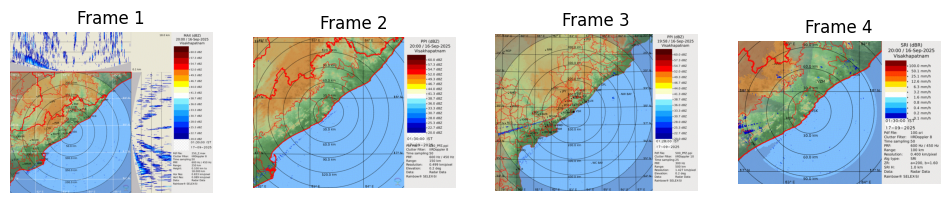

Images shape: (4, 64, 64, 3)
X shape: (1, 3, 64, 64, 3)
y shape: (1, 64, 64, 3)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_lstm2d_1 (ConvLSTM2D)      │ (None, 64, 64, 64)     │       154,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 3)      │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 174,211 (680.51 KB)

 Trainable params: 174,083 (680.01 KB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.1132 - val_loss: 0.0916
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0838 - val_loss: 0.0865
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0703 - val_loss: 0.0819
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0609 - val_loss: 0.0784
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0547 - val_loss: 0.0759
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0515 - val_loss: 0.0742
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0502 - val_loss: 0.0733
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0493 - val_loss: 0.0731
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0483 - val_loss: 0.0733
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0469 - val_loss: 0.0738
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0455 - val_loss: 0.0744
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0441 - val_loss: 0.0750
Epo

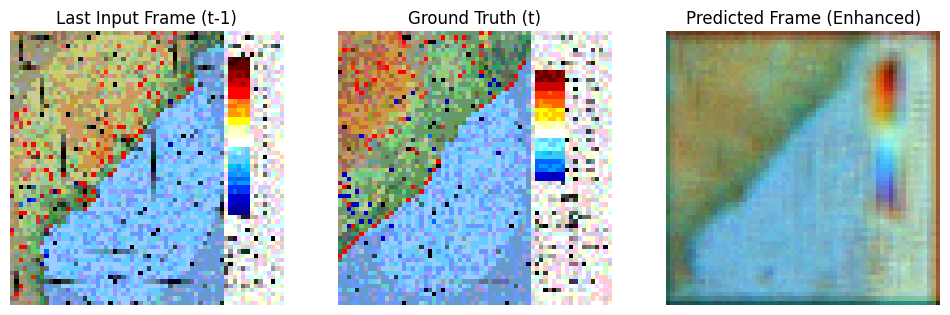

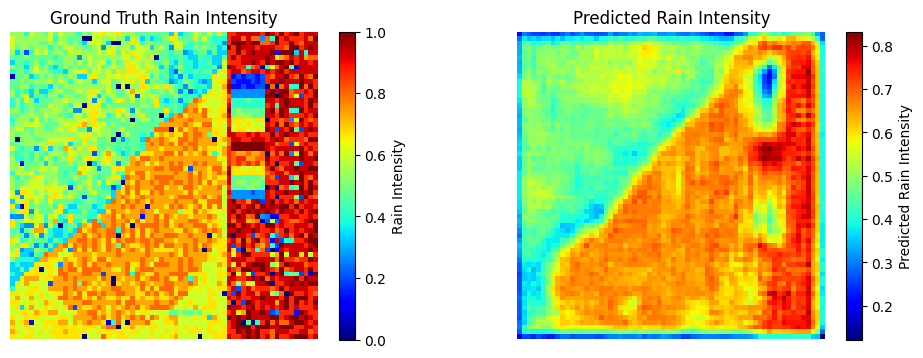

Sample 1 - SSIM: 0.0920, PSNR: 13.3069 dB
Saved 1 enhanced predicted images in /kaggle/working/predictions_enhanced


In [3]:
# ==============================
# FULL KAGGLE-READY CODE: WEATHER RADAR NOWCASTING
# ==============================

# ==============================
# Step 1: Import Libraries
# ==============================
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import cv2  # for histogram stretching

# ==============================
# Step 2: Load Radar Images
# ==============================
data_dir = "/kaggle/input/radderdataset1"
files = sorted(os.listdir(data_dir))
print("Radar image files:", files)

# Display raw dataset images
plt.figure(figsize=(12, 4))
for i, file in enumerate(files):
    img_path = os.path.join(data_dir, file)
    img = load_img(img_path)
    plt.subplot(1, len(files), i+1)
    plt.imshow(img)
    plt.title(f"Frame {i+1}")
    plt.axis("off")
plt.show()

# ==============================
# Step 3: Preprocess Images
# ==============================
img_size = (64, 64)
images = []
for file in files:
    img_path = os.path.join(data_dir, file)
    img = load_img(img_path, target_size=img_size)
    img_array = img_to_array(img) / 255.0  # normalize [0,1]
    images.append(img_array)

images = np.array(images)
print("Images shape:", images.shape)

# ==============================
# Step 4: Prepare Sequences (Input/Output)
# ==============================
sequence_length = 3  # 3 input frames → predict 4th
X, y = [], []

for i in range(len(images) - sequence_length):
    X.append(images[i:i+sequence_length])
    y.append(images[i+sequence_length])

X = np.array(X)
y = np.array(y)
print("X shape:", X.shape)
print("y shape:", y.shape)

# Train/test split (handle small dataset)
if len(X) > 1:
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.5, random_state=42
    )
else:
    X_train, y_train = X, y
    X_test, y_test = X, y

# ==============================
# Step 5: Build ConvLSTM Model
# ==============================
model = keras.Sequential([
    layers.ConvLSTM2D(
        filters=64, kernel_size=(3,3), padding="same",
        return_sequences=False, input_shape=(sequence_length, 64, 64, 3)
    ),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation="relu", padding="same"),
    layers.Conv2D(3, (3,3), activation="sigmoid", padding="same")
])

model.compile(optimizer="adam", loss="mse")
model.summary()

# ==============================
# Step 6: Train Model
# ==============================
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=1,
    verbose=1
)

# ==============================
# Step 7: Prediction
# ==============================
pred = model.predict(X_test)

# ==============================
# Step 8: Enhanced Visualization
# ==============================
num_to_display = min(5, X_test.shape[0])

for i in range(num_to_display):
    plt.figure(figsize=(12,4))
    
    # Last input frame
    plt.subplot(1,3,1)
    plt.imshow(X_test[i, -1])
    plt.title("Last Input Frame (t-1)")
    plt.axis("off")
    
    # Ground truth
    plt.subplot(1,3,2)
    plt.imshow(y_test[i])
    plt.title("Ground Truth (t)")
    plt.axis("off")
    
    # Predicted frame: gamma + histogram stretch
    pred_clip = np.clip(pred[i], 0, 1)
    pred_gamma = np.power(pred_clip, 1/1.2)
    pred_uint8 = (pred_gamma * 255).astype(np.uint8)
    pred_stretched = cv2.normalize(pred_uint8, None, 0, 255, cv2.NORM_MINMAX)
    
    plt.subplot(1,3,3)
    plt.imshow(pred_stretched)
    plt.title("Predicted Frame (Enhanced)")
    plt.axis("off")
    
    plt.show()

# ==============================
# Step 9: Rain Intensity Heatmaps
# ==============================
for i in range(num_to_display):
    plt.figure(figsize=(12,4))
    
    # Ground truth heatmap
    plt.subplot(1,2,1)
    rain_gt = np.mean(y_test[i], axis=-1)
    plt.imshow(rain_gt, cmap='jet')
    plt.colorbar(label="Rain Intensity")
    plt.title("Ground Truth Rain Intensity")
    plt.axis("off")
    
    # Predicted heatmap
    plt.subplot(1,2,2)
    rain_pred = np.mean(pred_stretched/255.0, axis=-1)  # scale back to 0-1
    plt.imshow(rain_pred, cmap='jet')
    plt.colorbar(label="Predicted Rain Intensity")
    plt.title("Predicted Rain Intensity")
    plt.axis("off")
    
    plt.show()

# ==============================
# Step 10: Evaluation Metrics
# ==============================
for i in range(num_to_display):
    true_gray = np.mean(y_test[i], axis=-1)
    pred_gray = np.mean(pred[i], axis=-1)
    
    ssim_score = ssim(true_gray, pred_gray, data_range=1.0)
    psnr_score = psnr(true_gray, pred_gray, data_range=1.0)
    
    print(f"Sample {i+1} - SSIM: {ssim_score:.4f}, PSNR: {psnr_score:.4f} dB")

# ==============================
# Step 11: Save Enhanced Predicted Images
# ==============================
save_dir = "/kaggle/working/predictions_enhanced"
os.makedirs(save_dir, exist_ok=True)

for i in range(num_to_display):
    plt.imsave(os.path.join(save_dir, f"predicted_enhanced_{i}.png"), pred_stretched)

print(f"Saved {num_to_display} enhanced predicted images in {save_dir}")


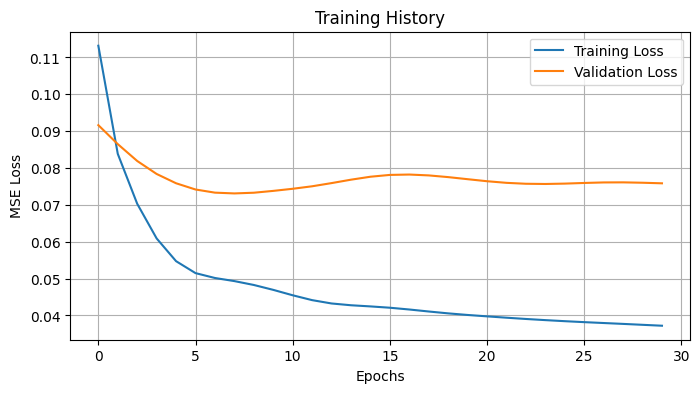

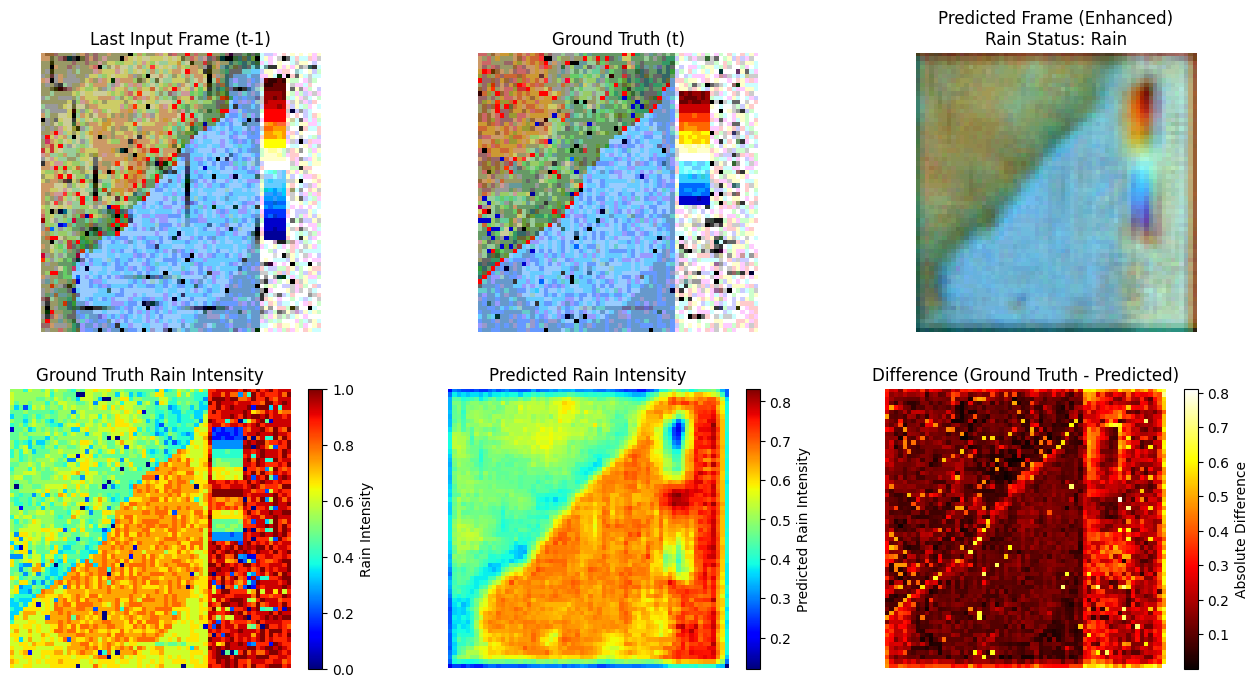

Sample 1 - SSIM: 0.1682, PSNR: 13.7978 dB, Rain Status: Rain


In [5]:
# ==============================
# Part 2: Visual Representation & Rain Prediction
# ==============================

num_to_display = min(5, X_test.shape[0])
rain_threshold = 0.1  # threshold for rain intensity (tune if needed)

# 1️⃣ Plot Training & Validation Loss
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training History")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.show()

# 2️⃣ Display Predictions + Rain Intensity + Difference + Rain/No-Rain
for i in range(num_to_display):
    # Prepare predicted frame
    pred_clip = np.clip(pred[i], 0, 1)
    pred_gamma = np.power(pred_clip, 1/1.2)
    pred_uint8 = (pred_gamma * 255).astype(np.uint8)
    pred_stretched = cv2.normalize(pred_uint8, None, 0, 255, cv2.NORM_MINMAX) / 255.0

    # Last input, ground truth, predicted
    input_frame = X_test[i, -1]
    ground_truth = y_test[i]
    predicted = pred_stretched

    # Compute difference
    diff = np.abs(ground_truth - predicted)

    # Compute rain intensity (mean over RGB channels)
    rain_gt = np.mean(ground_truth, axis=-1)
    rain_pred = np.mean(predicted, axis=-1)

    # Rain/No-Rain prediction
    avg_intensity = np.mean(rain_pred)
    rain_status = "Rain" if avg_intensity >= rain_threshold else "No Rain"

    plt.figure(figsize=(16,8))

    # Last input frame
    plt.subplot(2,3,1)
    plt.imshow(input_frame)
    plt.title("Last Input Frame (t-1)")
    plt.axis("off")

    # Ground truth
    plt.subplot(2,3,2)
    plt.imshow(ground_truth)
    plt.title("Ground Truth (t)")
    plt.axis("off")

    # Predicted frame
    plt.subplot(2,3,3)
    plt.imshow(predicted)
    plt.title(f"Predicted Frame (Enhanced)\nRain Status: {rain_status}")
    plt.axis("off")

    # Rain intensity heatmap (ground truth)
    plt.subplot(2,3,4)
    plt.imshow(rain_gt, cmap='jet')
    plt.colorbar(label="Rain Intensity")
    plt.title("Ground Truth Rain Intensity")
    plt.axis("off")

    # Rain intensity heatmap (predicted)
    plt.subplot(2,3,5)
    plt.imshow(rain_pred, cmap='jet')
    plt.colorbar(label="Predicted Rain Intensity")
    plt.title("Predicted Rain Intensity")
    plt.axis("off")

    # Difference map
    plt.subplot(2,3,6)
    diff_gray = np.mean(diff, axis=-1)
    plt.imshow(diff_gray, cmap='hot')
    plt.colorbar(label="Absolute Difference")
    plt.title("Difference (Ground Truth - Predicted)")
    plt.axis("off")

    plt.show()

    # Metrics
    true_gray = np.mean(ground_truth, axis=-1)
    pred_gray = np.mean(predicted, axis=-1)
    ssim_score = ssim(true_gray, pred_gray, data_range=1.0)
    psnr_score = psnr(true_gray, pred_gray, data_range=1.0)
    print(f"Sample {i+1} - SSIM: {ssim_score:.4f}, PSNR: {psnr_score:.4f} dB, Rain Status: {rain_status}")
